<h2> ====================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 24: Neural Networks (Part 1)</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=====================================================</h2>

<h2>Lecture Outline</h2>

<ul>
    <li> What is an Artificial Neural Net?</li>
    <li>Perceptron</li>
    <li>Logistic Regresion
        <ol>
            <li>Review</li>
            <li>Cost Function</li>
        </ol>
    <li> Gradient Descent</li>
    <li>Gradient Descent For Logistic Regression</li>
    <li> The Algorithm</li>
        
        
   </li>
    
 </ul>

<h2>ANNs</h2>

A Neural Net is a type of machine-learning model that is meant to mimic the biological neurons that compose our brains!

NNs are at the core of Deep Learning! They are very powerful and highly scalable tools used to tackle very complex real life problems. 

ANNs are widely used for:

<ol>
    
 <li>Recognising images: handwriting, self-driving cars, medicine etc. </li>
 <li>Modeling complex relationships between inputs and outputs</li>
 <li>Text Analysis</li>
 <li> Making purchase recommendations etc.</li>
 </ol>


The picture below displays the architecture of a rather simple 2-layer Neural Network. The first layer is called the <b> input layer</b>, this is the layer where the input data goes. The number of circles, known as <b> neurons</b> is equal to the number of features of our observed training samples. The final layer is called the <b>output layer</b>, this is where the results come out. The picture below depicts the case where we try to predict two different quantities, such as whether there is a <b>dog</b> or a <b>cat</b> in an image. The middle layer is known as the <b>hidden layer</b>, and this is the place where all the mathematical computations happen!

The arrows between each of the layers are known as the <b> links</b>. One can think of them as the channels through which the information is passed from each of the neurons in one layer to the next. 

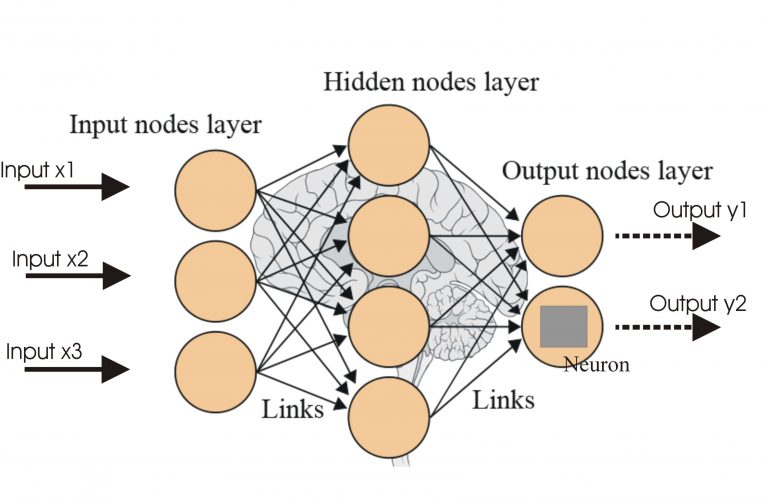 

( <a href="https://www.analyticsvidhya.com/blog/2016/08/evolution-core-concepts-deep-learning-neural-networks/" target='_blank'>Picture Source</a>)

<h2>Perceptron</h2>

The Perceptron is the simplest ANN there is. It is a $1-$layer NN; that is, it consists of one <b>input layer</b> and one <b> output layer</b>. The picture below displays the case where we have observations with only two features, namely $\vec{x}=\begin{bmatrix}x_1\\x_2\end{bmatrix}$ and a single output $\hat{y}$. The variables $w_1$ and $w_2$ are known as the <b>weights</b>, $b$ is the <b>bias</b>, and $z=\vec{w}^T\vec{x}+b=w_1x_1+w_2x_2+b$, where $\vec{w}=(w_1,w_2)$. The function $g(z)$ is what's called an <b>activation </b> function. We'll discuss different activations functions later on.

The weights and the bias are what will change in order for the NN to learn and approximate as best as possible the relationship between the input data $X$ and the response variable $Y$.
    
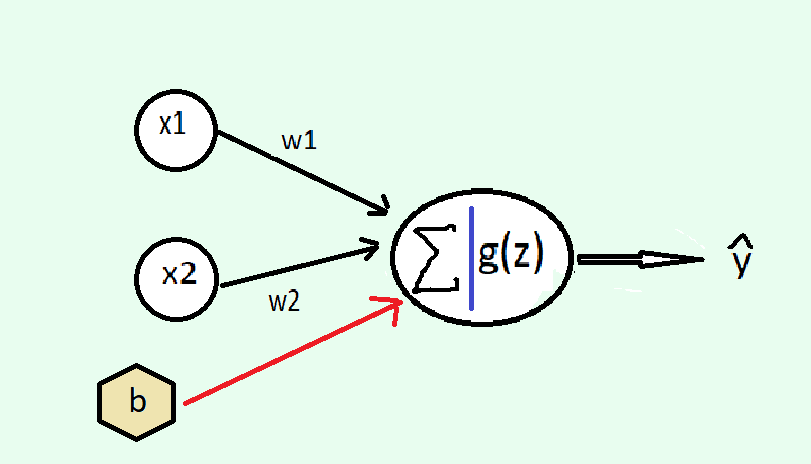

<h2>Logistic Regression</h2>

Given an input $x$ we want to compute $\hat{y}=P(y=1|x)$. For example, if $x$ is an image, we would want to know, for example, what's the probability that this is a picture of a dog.

The input $x$ is a vector, namely $x\in R^{n_x}$. So, the Logistic Regression parameters are: $w\in R^{n_x}$ and $b$.

Recall, that we model $\hat{y}$ using the <b>Sigmoid</b> function $$\sigma(z)=\frac{1}{1+e^{-z}}$$

That is, $$\hat{y}=\sigma\left(w^Tx+b\right)$$

Let's plot the Sigmoid function below:

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

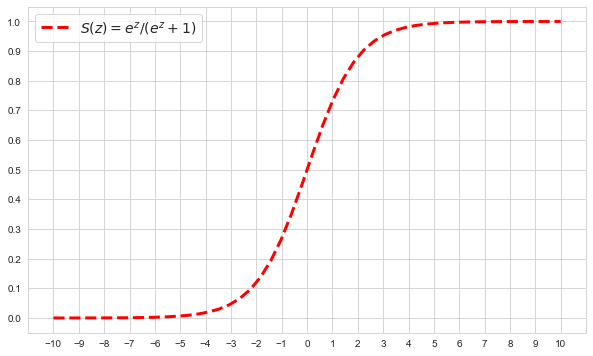

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

z=np.linspace(-10,10,50)

plt.yticks(np.arange(0,1.01,0.1))
plt.xticks(np.arange(-10,11,1))
plt.plot(z,sigmoid(z), 'r--', lw=3, label='$S(z)=e^z / (e^z+1)$')
plt.legend(fontsize=14)
plt.show()

<h2>Cost Function for Logistic Regression</h2>

We will denote the $i^{th}$ training observation by a superscript, namely $(x^{(i)},y^{(i)})$.

So, given a set of $m$ training samples $$\left\{\left(x^{(1)},y^{(1)}\right),\dots,\left(x^{(m)},y^{(m)}\right)\right\}\, \text{ we want }\, \, \hat{y}^{(i)}\approx y^{(i)}\, \text{ where } \, \hat{y}^{(i)}=\sigma\left(w^Tx^{(i)}+b\right)$$

Recall, $$\sigma\left(z^{(i)}\right)=\frac{1}{1+e^{-z^{(i)}}} \, \text{ where } \, z^{(i)}=w^Tx^{(i)}+b.$$

We need a way to measure how well our model is doing. In other words, how closely $\hat{y}$ is approximating $y.$ For reasons which will become clear shortly, we want our <b>loss function</b> to be <b>convex</b>. So, a way to measure just how good our $i^{th}$ output $\hat{y}^{(i)}$ is when the true value is $y^{(i)}$ we may use the following loss function (sometimes known as cross-entropy, or a version of it):

$$L\left(\hat{y}^{(i)},y^{(i)}\right)=-\left[y^{(i)}\log\left(\hat{y}^{(i)}\right)+\left(1-y^{(i)}\right)\log\left(1-\hat{y}^{(i)}\right)\right]$$

This is a convex function; that is, all of its tangent lines are below the graph, so it has a global minimum.

In [5]:
def loss_funct(w):
    return -(0.5*np.log(w)+0.5*np.log(1-w))

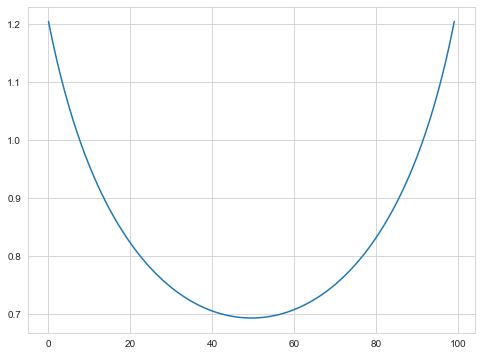

In [6]:
plt.figure(figsize=(8,6))

w=np.linspace(0.1,0.9,100)

plt.plot(loss_funct(w))

<h3>Why does minimizing the loss function give us what we want?</h3>

We give an informal reason by considering the two extreme cases:

<b>Case 1.</b> Suppose that $y=1$. Then the loss function takes the form

$$L(\hat{y},y)=-\log(\hat{y})$$

So, in order to minimize $L$, we have in turn to maximize $\log(\hat{y})$, which in turn means maximizing $\hat{y}$. But since $0\leq\hat{y}\leq 1$, this means that the algorithm will try to make $\hat{y}$ as close to $1$ as possible!

<b>Case 2.</b> Suppose $y=0$. Then $$L(\hat{y},y)=-\log(1-\hat{y})$$

So, minimizing $L$ means maximizing $\log(1-\hat{y})$, which in turn means maximizing $1-\hat{y}$ which means minimizing $\hat{y}$. So, to minimize $L$ we have to make $\hat{y}$ as close to $0$ as possible!

## Cost Function 

While the <b>loss function</b> measures how well we are doing with respect to a single training sample, the <b>cost function</b> on the other hand is a measure of how well the algorithm is performing on the entire data set as a whole. It is defined as the average of the loss functions over the entire training set:

$$J(w,b)=\frac{1}{m}\sum_{i=1}^mL\left(\hat{y}^{(i)},y^{(i)}\right)=-\frac{1}{m}\sum_{i=1}^m\left[y^{(i)}\log\left(\hat{y}^{(i)}\right)+\left(1-y^{(i)}\right)\log\left(1-\hat{y}^{(i)}\right)\right]$$

So, our goal will be to find the weights and bias factors, $(w,b)$, that minimize the cost function $J(w,b)$. (You can already tell there's some good-ole Calculus awaiting us!)

The bad news is that there is no known closed-form equation to compute $(w,b)$ that minimize $J(w,b)$, so we need to resort to other(numerical) methods.

<h2>Gradient Descent</h2>

We will use the <b>Gradient Descent</b> algorithm to find (or at least get close to) the global minimum of $J(w,b)$. The algorithm is very simple. We start by randomly initiating $w$ and $b$. 

To update $w$ and $b$, we repeat the following steps until the method converges or we reach a level of satisfaction:

\begin{eqnarray*}w&:=&w-\alpha\frac{\partial J}{\partial w}(w,b)\\
                 b&:=&b-\alpha\frac{\partial J}{\partial b}(w,b)
\end{eqnarray*}

where $\alpha$ is the <b>learning rate</b> which controls the pace at which the weighs are updated. 

We will illustrate gradient descent using the quadratic function $F(x)=x^2$

In [7]:
def F(x):
    return x**2

In [8]:
def dF(x):
    return 2*x

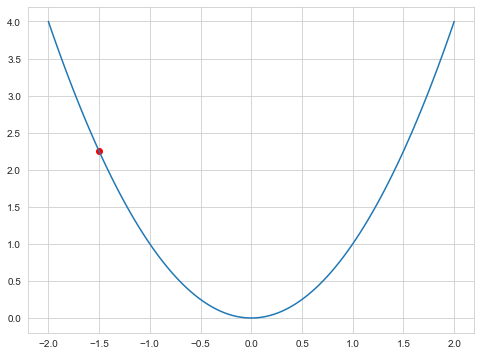

In [9]:
plt.figure(figsize=(8,6))

w=np.linspace(-2,2,100)

plt.plot(w,F(w))
plt.scatter(-1.5,F(-1.5), color='r')

In [10]:
def grad_desc(n,x,lr):
    x_lst=[]
    for i in range(n):
        x=x-lr*dF(x)
        x_lst.append(x)
        
    return x,x_lst
        

In [14]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib import animation, rc
from IPython.display import HTML

In [81]:
import itertools



fig = plt.figure(figsize=(12,8))


# def init():
#     scat=plt.scatter(df['X1'],df['X2'], c=np.random.randn(0,4,df.shape[0]))
#     return scat,
colors = itertools.cycle(["r",'g', "y"])
def run_animation(n,x,lr):
    
    x,x_lst=grad_desc(n,x,lr)
    
    
    
    def update_plot(i):

        x=x_lst[i]

        scat=plt.scatter(x,F(x),c=next(colors), marker='^',s=150)

        return scat,



    fig = plt.figure(figsize=(12,8))
    plt.title("Gradient Descent",fontsize=22)

    d=np.linspace(-2,2,100)

    plt.plot(d,F(d))
    plt.scatter(x,F(x), color='y')



    anim = FuncAnimation(fig, update_plot,frames=n, interval=1000, blit=True)

    # rc('animation', html='html5')  
    
    return HTML(anim.to_html5_video())
    
    
    

# anim = FuncAnimation(fig, update_plot, init_func=,frames=9, interval=1000, blit=True)

# anim.save('grad_descent.gif', writer='PillowWriter')

<Figure size 864x576 with 0 Axes>

In [85]:
#run_animation(10,2,0.1)

<h3>The importance of the learning rate $\alpha$</h3>

As we will demonstrate below, picking the wrong initial learning rate may make the difference betwen converging or diverging of the algorithm. That's why it is important to use the learning rate as a parameter. If we pick an initial point of $x_0=-1$ and a learning rate of $\alpha=1$ the gradient descent algorithm diverges for the quadratic function $F(x)=x^2$

In [86]:
#run_animation(10,1,1)

<h2>Gradient Descent For Logistic Regression</h2>

We'll illustrate it for one training sample first and we'll assume that our training samples have only two features.

$$\fbox{$(x_1,x_2,b)\,\&\,(w_1,w_2)$}\longrightarrow\fbox{$z=w_1x_1+w_2x_2+b$}\Rightarrow\fbox{$\hat{y}=\sigma(z)$}\longrightarrow \fbox{$L(\hat{y},y)$}$$

So, we need:

\begin{eqnarray*} 
w_1&:=&w_1-\alpha\frac{\partial L}{\partial w_1}(w,b)\\
w_2&:=&w_2-\alpha\frac{\partial L}{\partial w_2}(w,b)\\
b=&:=&b-\alpha\frac{\partial L}{\partial b}(w,b)
\end{eqnarray*}


To compute these partial derivatives we need to use <b> chain rule</b>:

$$\frac{\partial L}{\partial w_i}(w,b)=\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial w_i}$$


For short, let us introduce some notation first, which will especially be useful when we start coding a NN in python.

\begin{eqnarray*}
d w_i&:=&\frac{\partial L}{\partial w_i}\\
d b &:=&\frac{\partial L}{\partial b}\\
d\hat{y}&:=&\frac{\partial L}{\partial \hat{y}}(\hat{y},y)\\
dz&:=&\frac{\partial L}{\partial z}(\hat{y},y)
\end{eqnarray*}

So,

$$d\hat{y}=-\frac{\partial}{\partial \hat{y}}\left[y\log\left(\hat{y}\right)+\left(1-y\right)\log\left(1-\hat{y}\right)\right]=-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}}$$


$$\frac{\partial \hat{y}}{\partial z}=\frac{\partial }{\partial z} \sigma(z)=\sigma(z)(1-\sigma(z))=\hat{y}\,(1-\hat{y})$$


$$dz=\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z}=\hat{y}-y$$

$$\frac{\partial z}{\partial w_i}=x_i$$


So $$d w_i=x_i\, dz \, \text{ and } db=dz$$

Finally, to perform <b>gradient descent</b> in this particular example we would use the formulas above and then make the updates correspondingly as below


\begin{eqnarray*}
w_i&:=&w_i-\alpha\,dw_i \, \text{ for } i=1,2\\
b &:=&b-\alpha\, db
\end{eqnarray*}

<h3>Gradient Descent on m Examples</h3>

This follows readily from what we did before. The only difference is that now the cost function is


$$J(w,b)=\frac{1}{m}\sum_{i=1}^mL\left(\hat{y}^{(i)},y^{(i)}\right)$$

So we need to compute $\frac{\partial J}{\partial w_1}(w,b)$, $\frac{\partial J}{\partial w_2}(w,b)$ and $\frac{\partial J}{\partial b}(w,b)$. To do that we need $$d w_1^{(i)}, d w_2^{(i)}, d b^{(i)}$$ for each of the training samples $i=1,2,\dots, m$, which is something we already did before.

So, we have $$d w_j=\frac{\partial J}{\partial w_j}(w,b)=\frac{1}{m}\sum_{i=1}^mx_j^{(i)}\, dz^{(i)}=\frac{1}{m}\sum_{i=1}^mx_j^{(i)}\left(\hat{y}^{(i)}-y^{(i)}\right)$$

$$db=\frac{1}{m}\sum_{i=1}^mdz^{(i)}$$



<h2>Algorithm</h2>

For this specific example, one iteration/step of the gradient descent the algorithm would be as follows:

Initiate $w=(w_1,w_2), b$ and $J=0,dw=0,db=0$


For $i$ in $range(1,m)$:

$z^{(i)}=w^Tx^{(i)}+b^{(i)}$

$\hat{y}^{(i)}=\sigma(z^{(i)})$

$J+=-\left[y^{(i)}\log\left(\hat{y}^{(i)}\right)+\left(1-y^{(i)}\right)\log\left(1-\hat{y}^{(i)}\right)\right]$

$dz^{(i)}=\hat{y}^{(i)}-y^{(i)}$

$db+=dz^{(i)}$

For j in range(1,$n_x=2$): (This takes place inside the above for loop)

$dw_j+=x_j^{(i)}\,dz^{(i)}$

(Leave the for loops)

$J:=J/m,\, dw_j:=dw_j/m,\, db:=db/m$

(One step of Gradient Descent)

$w_j:=w_j-\alpha\,dw_j$

$b :=b-\alpha\, db$



<h2>Vectorization of Logistic Regression</h2>

Next lesson